In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# Data Preparation and Feature Engineering

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np 
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
online_retail = fetch_ucirepo(id=352) 
  
X = online_retail.data.features 
X_with_id = online_retail.data.features.copy()

for id_col in online_retail.metadata["index_col"]:
    X_with_id[id_col] = online_retail.data.ids[id_col]

In [4]:
df = X_with_id.copy()
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,536365,85123A
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,71053
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,536365,84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029G
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029E
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,581587,22613
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,581587,22899
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,581587,23254
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,581587,23255


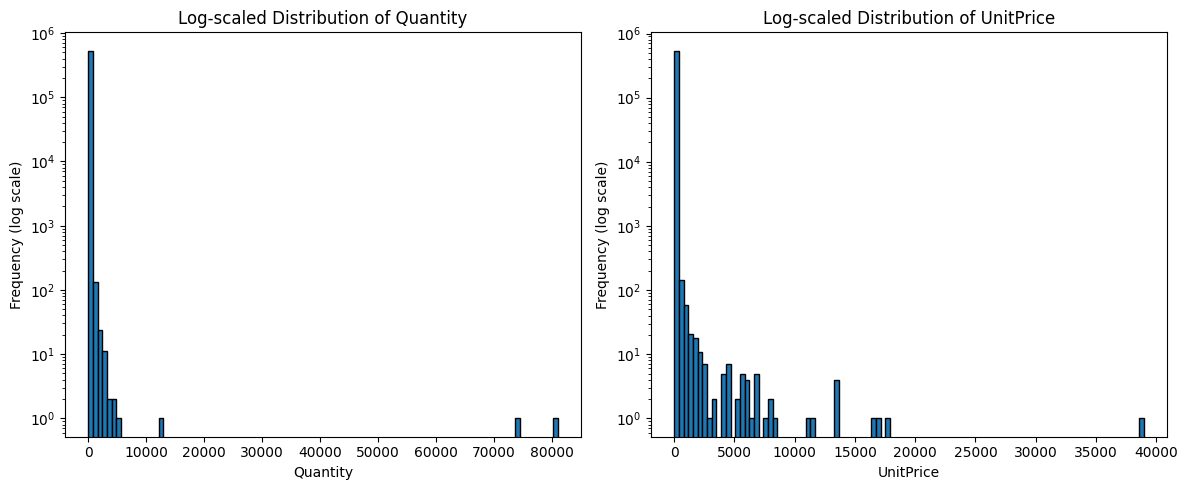

In [5]:
import matplotlib.pyplot as plt

cols = ["Quantity", "UnitPrice"]

plt.figure(figsize=(12,5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    plt.hist(df[col][df[col] > 0], bins=100, edgecolor="black", log=True)  # exclude <=0 for log
    plt.title(f"Log-scaled Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency (log scale)")

plt.tight_layout()
plt.show()


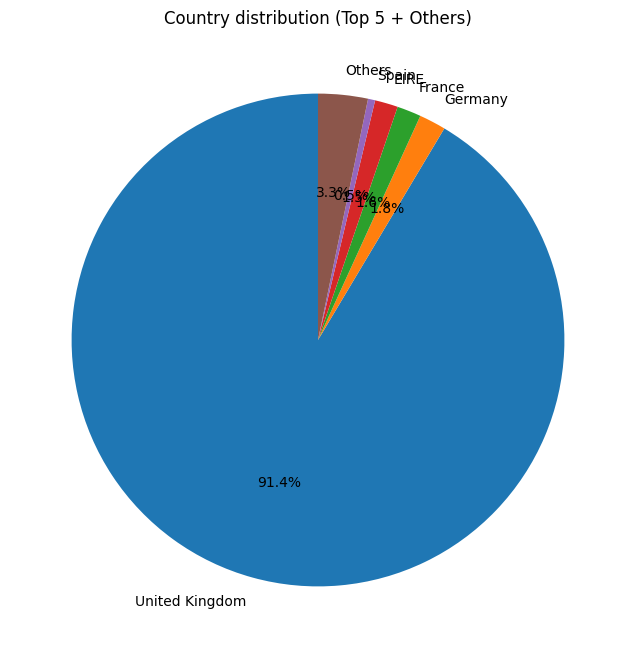

In [6]:
col = "Country"

counts = df[col].value_counts()

top_n = 5
top_counts = counts.head(top_n)
others_count = counts[top_n:].sum()

counts_for_plot = pd.concat([top_counts, pd.Series({"Others": others_count})])

plt.figure(figsize=(8,8))
plt.pie(
    counts_for_plot,
    labels=counts_for_plot.index,
    autopct=lambda p: f"{p:.1f}%" if p > 0 else "",
    startangle=90
)
plt.title(f"{col} distribution (Top {top_n} + Others)")
plt.show()

In [7]:
df = df.dropna(subset=["CustomerID"])
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,536365,85123A
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,71053
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,536365,84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029G
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029E
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,581587,22613
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,581587,22899
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,581587,23254
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,581587,23255


In [8]:
print(df["Quantity"].min())
print(df["UnitPrice"].min())

-80995
0.0


In [9]:
negative_qty = df[df["Quantity"] < 0]

negative_qty.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
141,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,C536379,D
154,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,C536383,35004C
235,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,C536391,22556
236,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,C536391,21984
237,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,C536391,21983


In [10]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,536365,85123A
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,71053
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,536365,84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029G
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029E
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,581587,22613
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,581587,22899
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,581587,23254
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,581587,23255


In [11]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [12]:
countries = df["Country"].unique()

country_dfs = {country: df[df["Country"] == country].reset_index(drop=True) 
               for country in countries}

In [13]:
uk_df = country_dfs["United Kingdom"]
uk_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,536365,85123A
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,71053
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,536365,84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029G
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029E
...,...,...,...,...,...,...,...,...
354340,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,581585,22466
354341,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,581586,22061
354342,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,581586,23275
354343,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,581586,21217


##  Feature Engineering

In [14]:
uk_df.dtypes

Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
InvoiceNo       object
StockCode       object
dtype: object

In [15]:
# Ensure InvoiceDate is datetime
uk_df["InvoiceDate"] = pd.to_datetime(uk_df["InvoiceDate"])

# Add a 'TotalValue' column (Quantity × UnitPrice)
uk_df["TotalValue"] = uk_df["Quantity"] * uk_df["UnitPrice"]

# Use max date in dataset as reference point for recency
max_date = uk_df["InvoiceDate"].max()

# Group by CustomerID and calculate RFM
rfm = uk_df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (max_date - x.max()).days,   # Recency
    "InvoiceNo": "nunique",                              # Frequency
    "TotalValue": "sum"                                  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,11,4196.01
2,12748.0,0,210,33719.73
3,12749.0,3,5,4090.88
4,12820.0,2,4,942.34


In [16]:
print(f"Shape: {rfm.shape}")

Shape: (3921, 4)


In [17]:
rfm.describe(include='all')

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.188472,4.246111,1863.910113
std,1576.823683,99.528995,7.205750,7481.922217
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,1.000000,300.040000
50%,15569.000000,50.000000,2.000000,651.820000
75%,16913.000000,142.000000,5.000000,1575.890000
max,18287.000000,373.000000,210.000000,259657.300000


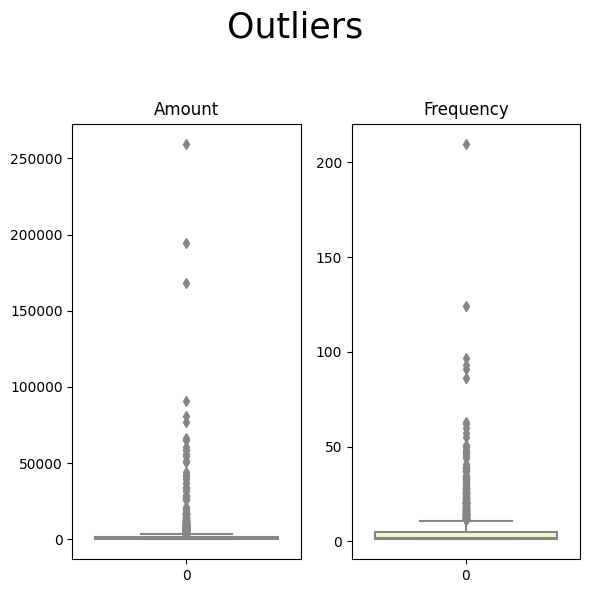

In [18]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=rfm['Monetary'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=rfm['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

In [19]:
from sklearn.ensemble import IsolationForest
rfm2 = rfm.copy()

In [20]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.05), max_features=1.0)
model.fit(rfm2)

IsolationForest(contamination=0.05, n_estimators=150)

In [21]:
scores=model.decision_function(rfm2)
anomaly=model.predict(rfm2)

rfm2['scores']=scores
rfm2['anomaly']=anomaly

anomaly = rfm2.loc[rfm2['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 196


In [22]:
rfm2

,CustomerID,Recency,Frequency,Monetary,scores,anomaly
0,12346.0,325,1,77183.60,-0.174849,-1
1,12747.0,1,11,4196.01,0.003280,1
2,12748.0,0,210,33719.73,-0.221616,-1
3,12749.0,3,5,4090.88,0.029561,1
4,12820.0,2,4,942.34,0.065380,1
...,...,...,...,...,...,...
3916,18280.0,277,1,180.60,0.054982,1
3917,18281.0,180,1,80.82,0.079288,1
3918,18282.0,7,2,178.05,0.092317,1
3919,18283.0,3,16,2094.88,0.002982,1


In [23]:
rfm2 = rfm2.drop(anomaly_index, axis = 0).reset_index(drop=True)

In [24]:
rfm2

,CustomerID,Recency,Frequency,Monetary,scores,anomaly
0,12747.0,1,11,4196.01,0.003280,1
1,12749.0,3,5,4090.88,0.029561,1
2,12820.0,2,4,942.34,0.065380,1
3,12821.0,213,1,92.72,0.049645,1
4,12822.0,70,2,948.88,0.085863,1
...,...,...,...,...,...,...
3720,18280.0,277,1,180.60,0.054982,1
3721,18281.0,180,1,80.82,0.079288,1
3722,18282.0,7,2,178.05,0.092317,1
3723,18283.0,3,16,2094.88,0.002982,1


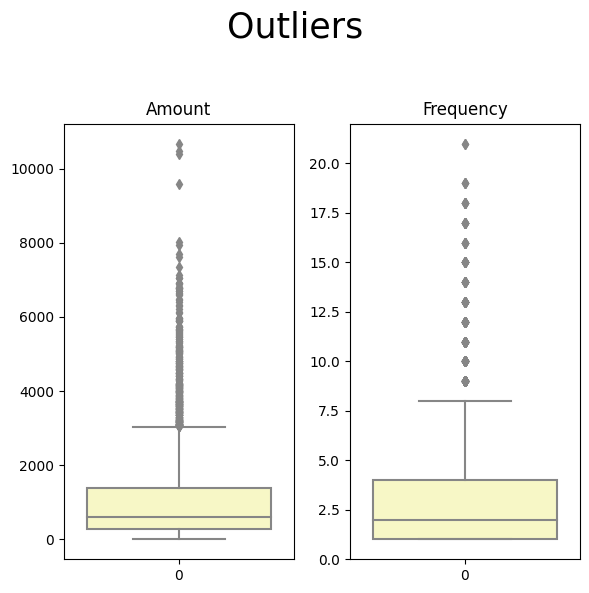

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=rfm2['Monetary'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=rfm2['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

In [26]:
rfm2.drop(['CustomerID','scores', 'anomaly'], axis = 1, inplace =True)

In [27]:
rfm2

,Recency,Frequency,Monetary
0,1,11,4196.01
1,3,5,4090.88
2,2,4,942.34
3,213,1,92.72
4,70,2,948.88
...,...,...,...
3720,277,1,180.60
3721,180,1,80.82
3722,7,2,178.05
3723,3,16,2094.88


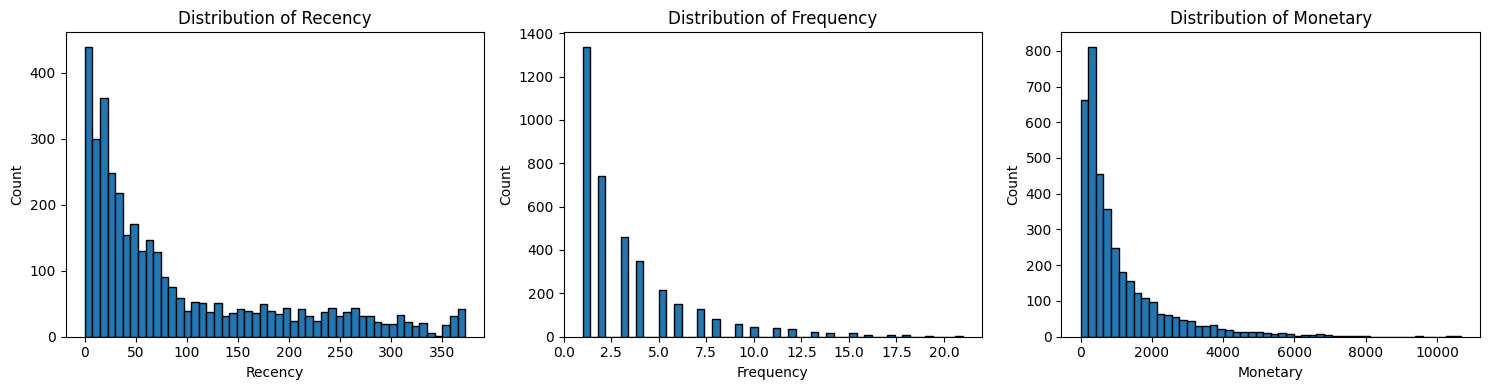

In [28]:
rfm_features = ["Recency", "Frequency", "Monetary"]

plt.figure(figsize=(15,4))
for i, col in enumerate(rfm_features, 1):
    plt.subplot(1, 3, i)
    plt.hist(rfm2[col], bins=50, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

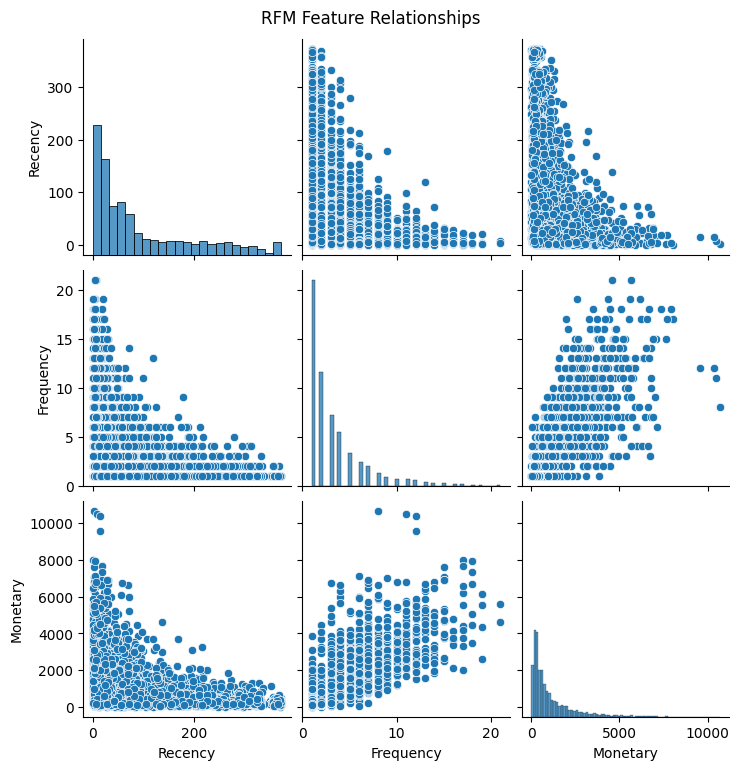

In [29]:
sns.pairplot(rfm2[["Recency", "Frequency", "Monetary"]])
plt.suptitle("RFM Feature Relationships", y=1.02)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm3=scaler.fit_transform(rfm2)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm2)
rfm_scaled = pd.DataFrame(rfm_scaled, 
                          columns=rfm2.columns, 
                          index=rfm2.index)

In [32]:
rfm3

array([[-0.93022231,  2.51222462,  2.50757425],
       [-0.90987701,  0.55795153,  2.42312059],
       [-0.92004966,  0.23223934, -0.10618336],
       ...,
       [-0.86918643, -0.41918502, -0.72015736],
       [-0.90987701,  4.14078554,  0.81968195],
       [-0.5131438 , -0.09347284,  0.61274518]])

In [33]:
rfm_scaled

,Recency,Frequency,Monetary
0,-0.930222,2.512225,2.507574
1,-0.909877,0.557952,2.423121
2,-0.920050,0.232239,-0.106183
3,1.226379,-0.744897,-0.788705
4,-0.228310,-0.419185,-0.100930
...,...,...,...
3720,1.877428,-0.744897,-0.718109
3721,0.890681,-0.744897,-0.798265
3722,-0.869186,-0.419185,-0.720157
3723,-0.909877,4.140786,0.819682


# Apply and Analyze Clustering Methods and Clustering Evaluation

##  K-Means Clustering

### Finding the optimal number of clusters

#### Elbow Method

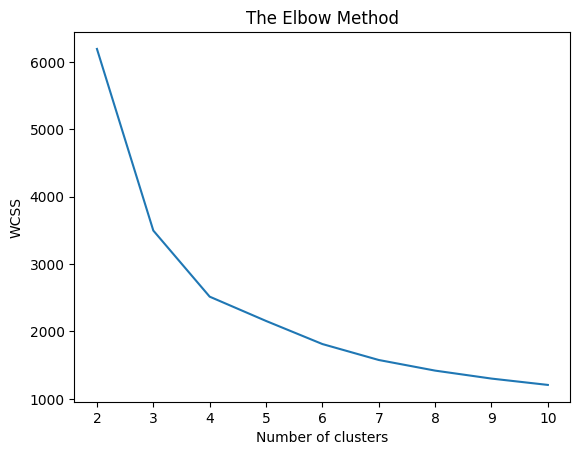

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

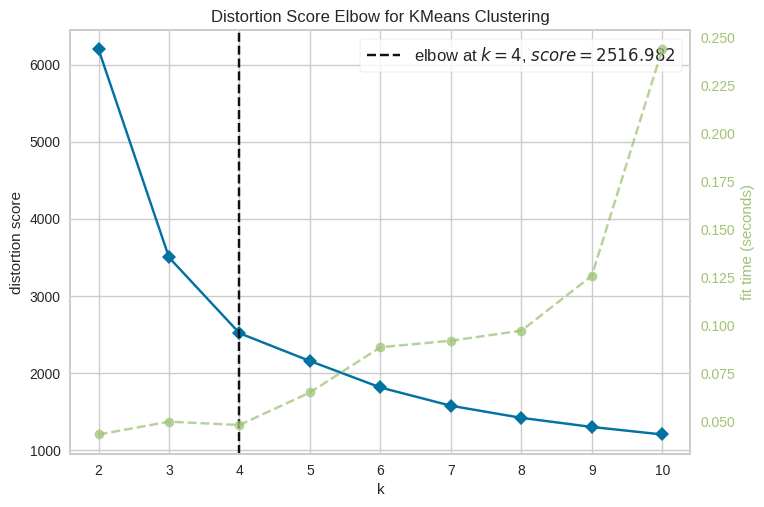

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,11), timings= True)
visualizer.fit(rfm_scaled) 
visualizer.show()   

#### Silhouette Score

In [36]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.494
k=3, silhouette score=0.491
k=4, silhouette score=0.467
k=5, silhouette score=0.411
k=6, silhouette score=0.393
k=7, silhouette score=0.398
k=8, silhouette score=0.377
k=9, silhouette score=0.375
k=10, silhouette score=0.353


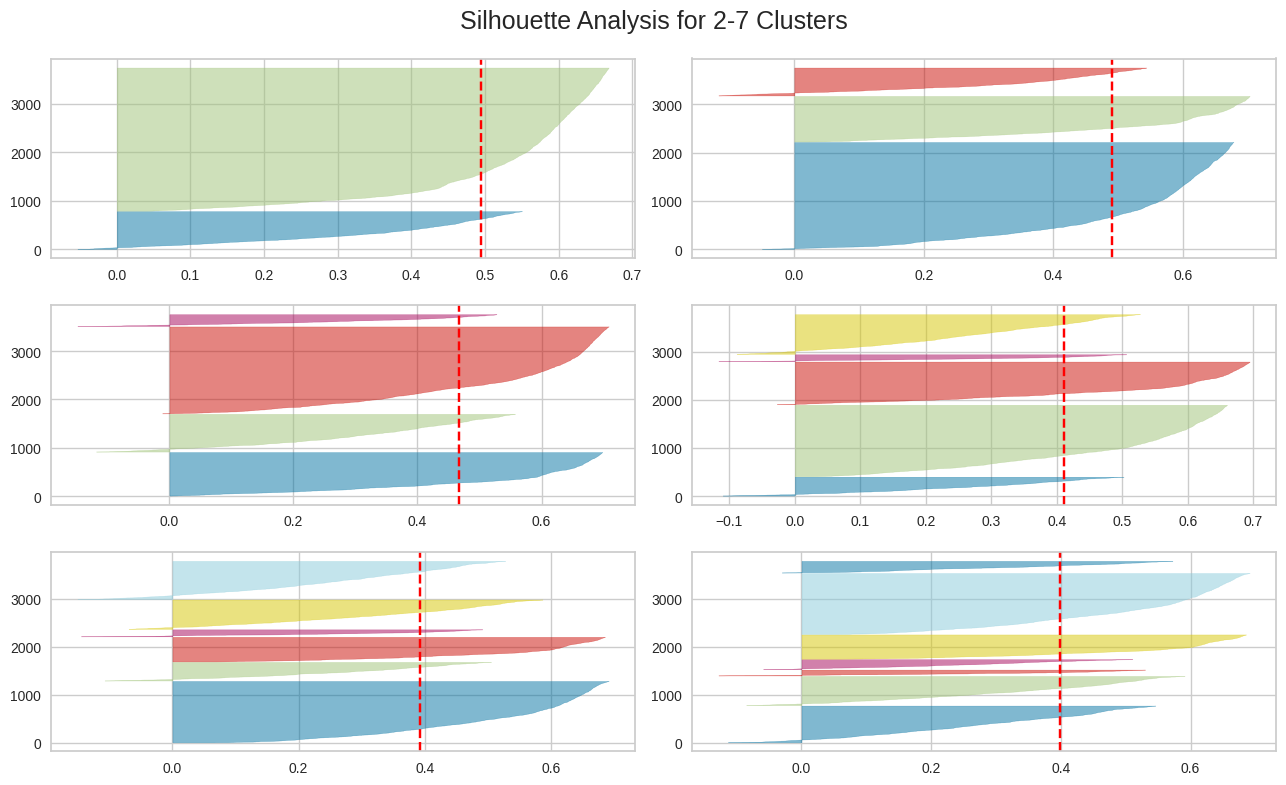

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(rfm_scaled)

Optimal number of clusters seems to be 4.

### KMeans with K as 4

In [38]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 22)
y_kmeans = kmeans.fit_predict(rfm_scaled)

In [39]:
df_kmeans = rfm_scaled.copy()
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

Cluster
3    1799
1     902
2     781
0     243
Name: count, dtype: int64

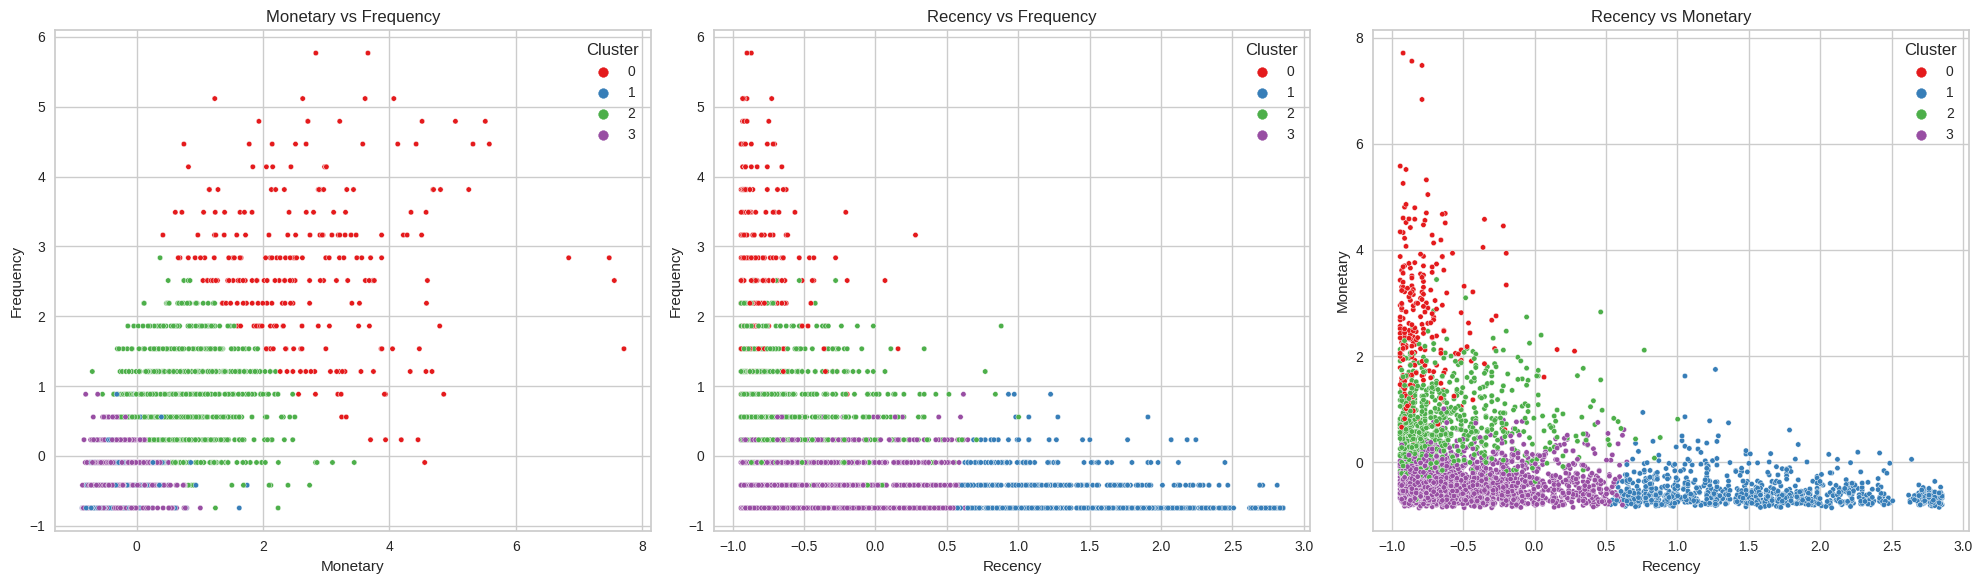

In [40]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Monetary vs Frequency
sns.scatterplot(data=df_kmeans, x='Monetary', y='Frequency', 
                hue='Cluster', s=15, palette="Set1", ax=axes[0])
axes[0].set_title("Monetary vs Frequency")

# Plot 2: Recency vs Frequency
sns.scatterplot(data=df_kmeans, x='Recency', y='Frequency', 
                hue='Cluster', s=15, palette="Set1", ax=axes[1])
axes[1].set_title("Recency vs Frequency")

# Plot 3: Recency vs Monetary
sns.scatterplot(data=df_kmeans, x='Recency', y='Monetary', 
                hue='Cluster', s=15, palette="Set1", ax=axes[2])
axes[2].set_title("Recency vs Monetary")

# Adjust layout
plt.tight_layout()
plt.show()

In [41]:
import plotly.express as px

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    df_kmeans, 
    x='Recency', 
    y='Frequency', 
    z='Monetary',
    color='Cluster',        # cluster color
    size_max=10,
    opacity=0.7,
    labels={'Recency':'Recency', 'Frequency':'Frequency', 'Monetary':'Monetary'},
    title="Interactive 3D RFM Clustering"
)

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    )
)

fig.show()

### Cluster Centroids and Customer Segments

In [42]:
centroids_scaled = kmeans.cluster_centers_

centroids = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(centroids, columns=rfm_scaled.columns)
centroids_df['Cluster'] = range(4)

print("Cluster centroids (original RFM scale):")
centroids_df

Cluster centroids (original RFM scale):


,Recency,Frequency,Monetary,Cluster
0,16.459016,11.528689,4441.670000,0
1,246.941242,1.443459,385.252673,1
2,32.979513,5.722151,2005.129129,2
3,51.077864,2.035595,559.129323,3


| Cluster | Recency | Frequency | Monetary | Interpretation                 |
| ------- | ------- | --------- | -------- | ------------------------------ |
| 0       | Medium  | Low       | Low      | New customers                  |
| 1       | High    | High      | High     | Loyal & high spending customers|
| 2       | High    | Medium    | Medium   | Active mid-value customers     |
| 3       | Low     | Low       | Low      | Inactive customers             |

### Evaluation

In [43]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

sil_score = silhouette_score(rfm_scaled, y_kmeans)
print(f"Silhouette Score: {sil_score:.3f}")


centroids = kmeans.cluster_centers_

intra_distances = []
for i in range(kmeans.n_clusters):
    cluster_points = rfm_scaled[y_kmeans == i]
    centroid = centroids[i]
    intra_dist = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
    intra_distances.append(intra_dist)

print(f"Average intra-cluster distances per cluster: {intra_distances}")

inter_distances = cdist(centroids, centroids)
inter_distances = inter_distances[np.triu_indices_from(inter_distances, k=1)]
print(f"Average inter-cluster distance: {np.mean(inter_distances):.3f}")

calinski_harabasz_index = calinski_harabasz_score(rfm_scaled, y_kmeans)
print(f"Calinski harabasz Index: {calinski_harabasz_index:.3f}")

davies_bouldin_index = davies_bouldin_score(rfm_scaled, y_kmeans)
print(f"Davies bouldin Index: {davies_bouldin_index:.3f}")

Silhouette Score: 0.467
Average intra-cluster distances per cluster: [1.4649759551987203, 0.665880486332695, 0.8513733392305897, 0.5561973451963874]
Average inter-cluster distance: 3.150
Calinski harabasz Index: 4266.555
Davies bouldin Index: 0.786


##  Hierarchical Clustering (AGNES)

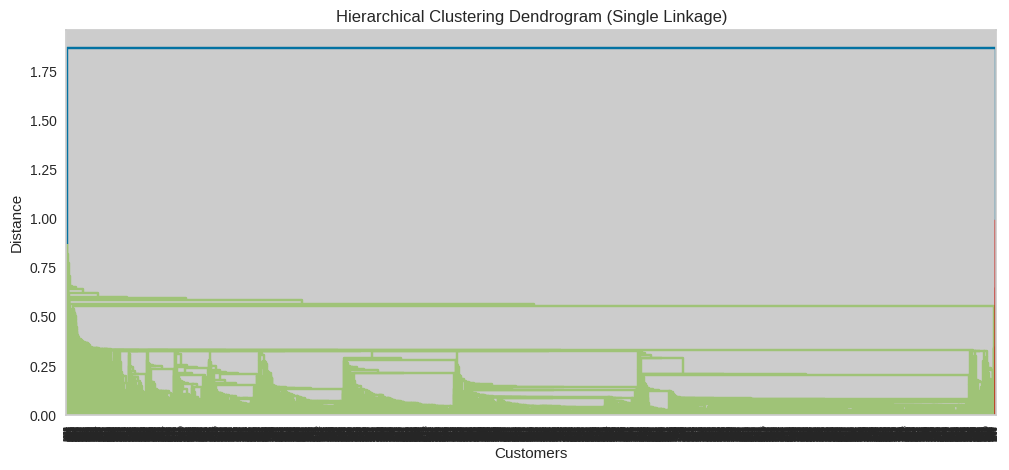

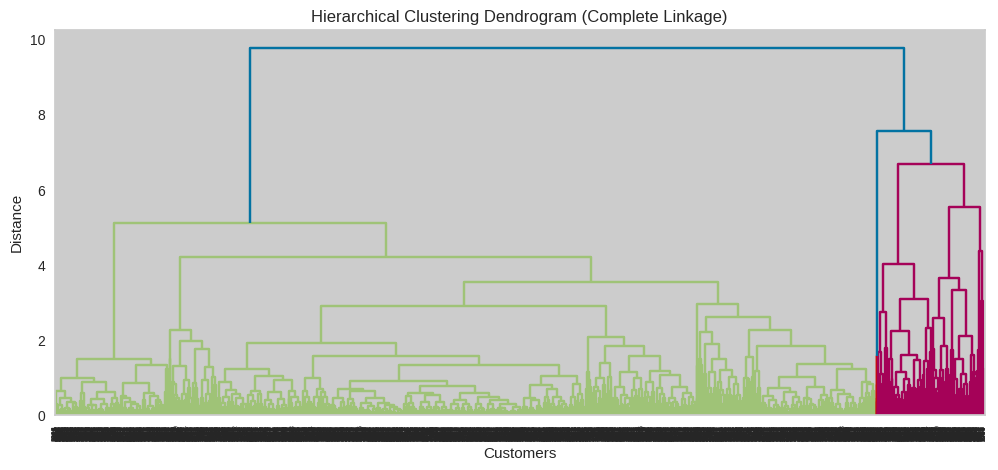

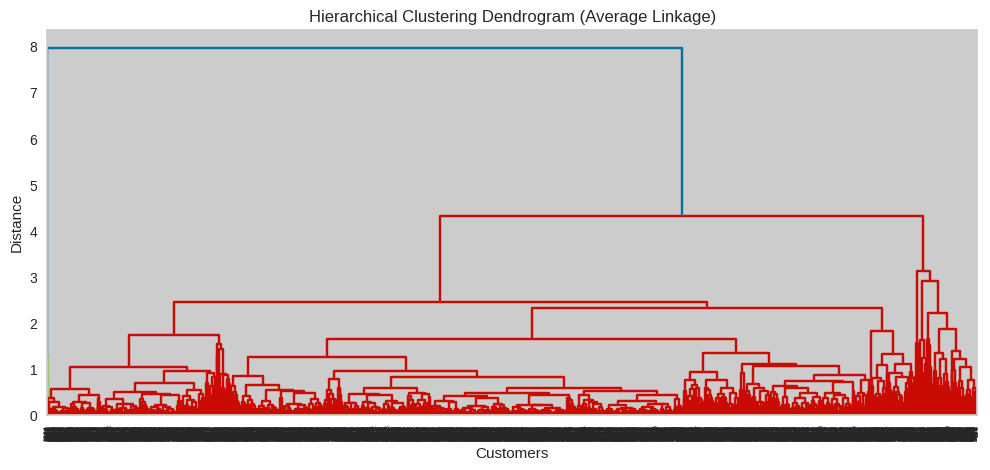

In [44]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Single Linkage
plt.figure(figsize=(12, 5))
dend_single = sch.dendrogram(sch.linkage(rfm_scaled, method='single'))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# Complete Linkage
plt.figure(figsize=(12, 5))
dend_complete = sch.dendrogram(sch.linkage(rfm_scaled, method='complete'))
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# Average Linkage
plt.figure(figsize=(12, 5))
dend_average = sch.dendrogram(sch.linkage(rfm_scaled, method='average'))
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [45]:
from sklearn.cluster import AgglomerativeClustering

# Single Linkage
hc_single = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = hc_single.fit_predict(rfm_scaled)

# Complete Linkage
hc_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = hc_complete.fit_predict(rfm_scaled)

# Average Linkage
hc_average = AgglomerativeClustering(n_clusters=3, linkage='average')
labels_average = hc_average.fit_predict(rfm_scaled)

In [46]:
df_agnes = rfm_scaled.copy()
df_agnes['HC_Single'] = labels_single
df_agnes['HC_Complete'] = labels_complete
df_agnes['HC_Average'] = labels_average

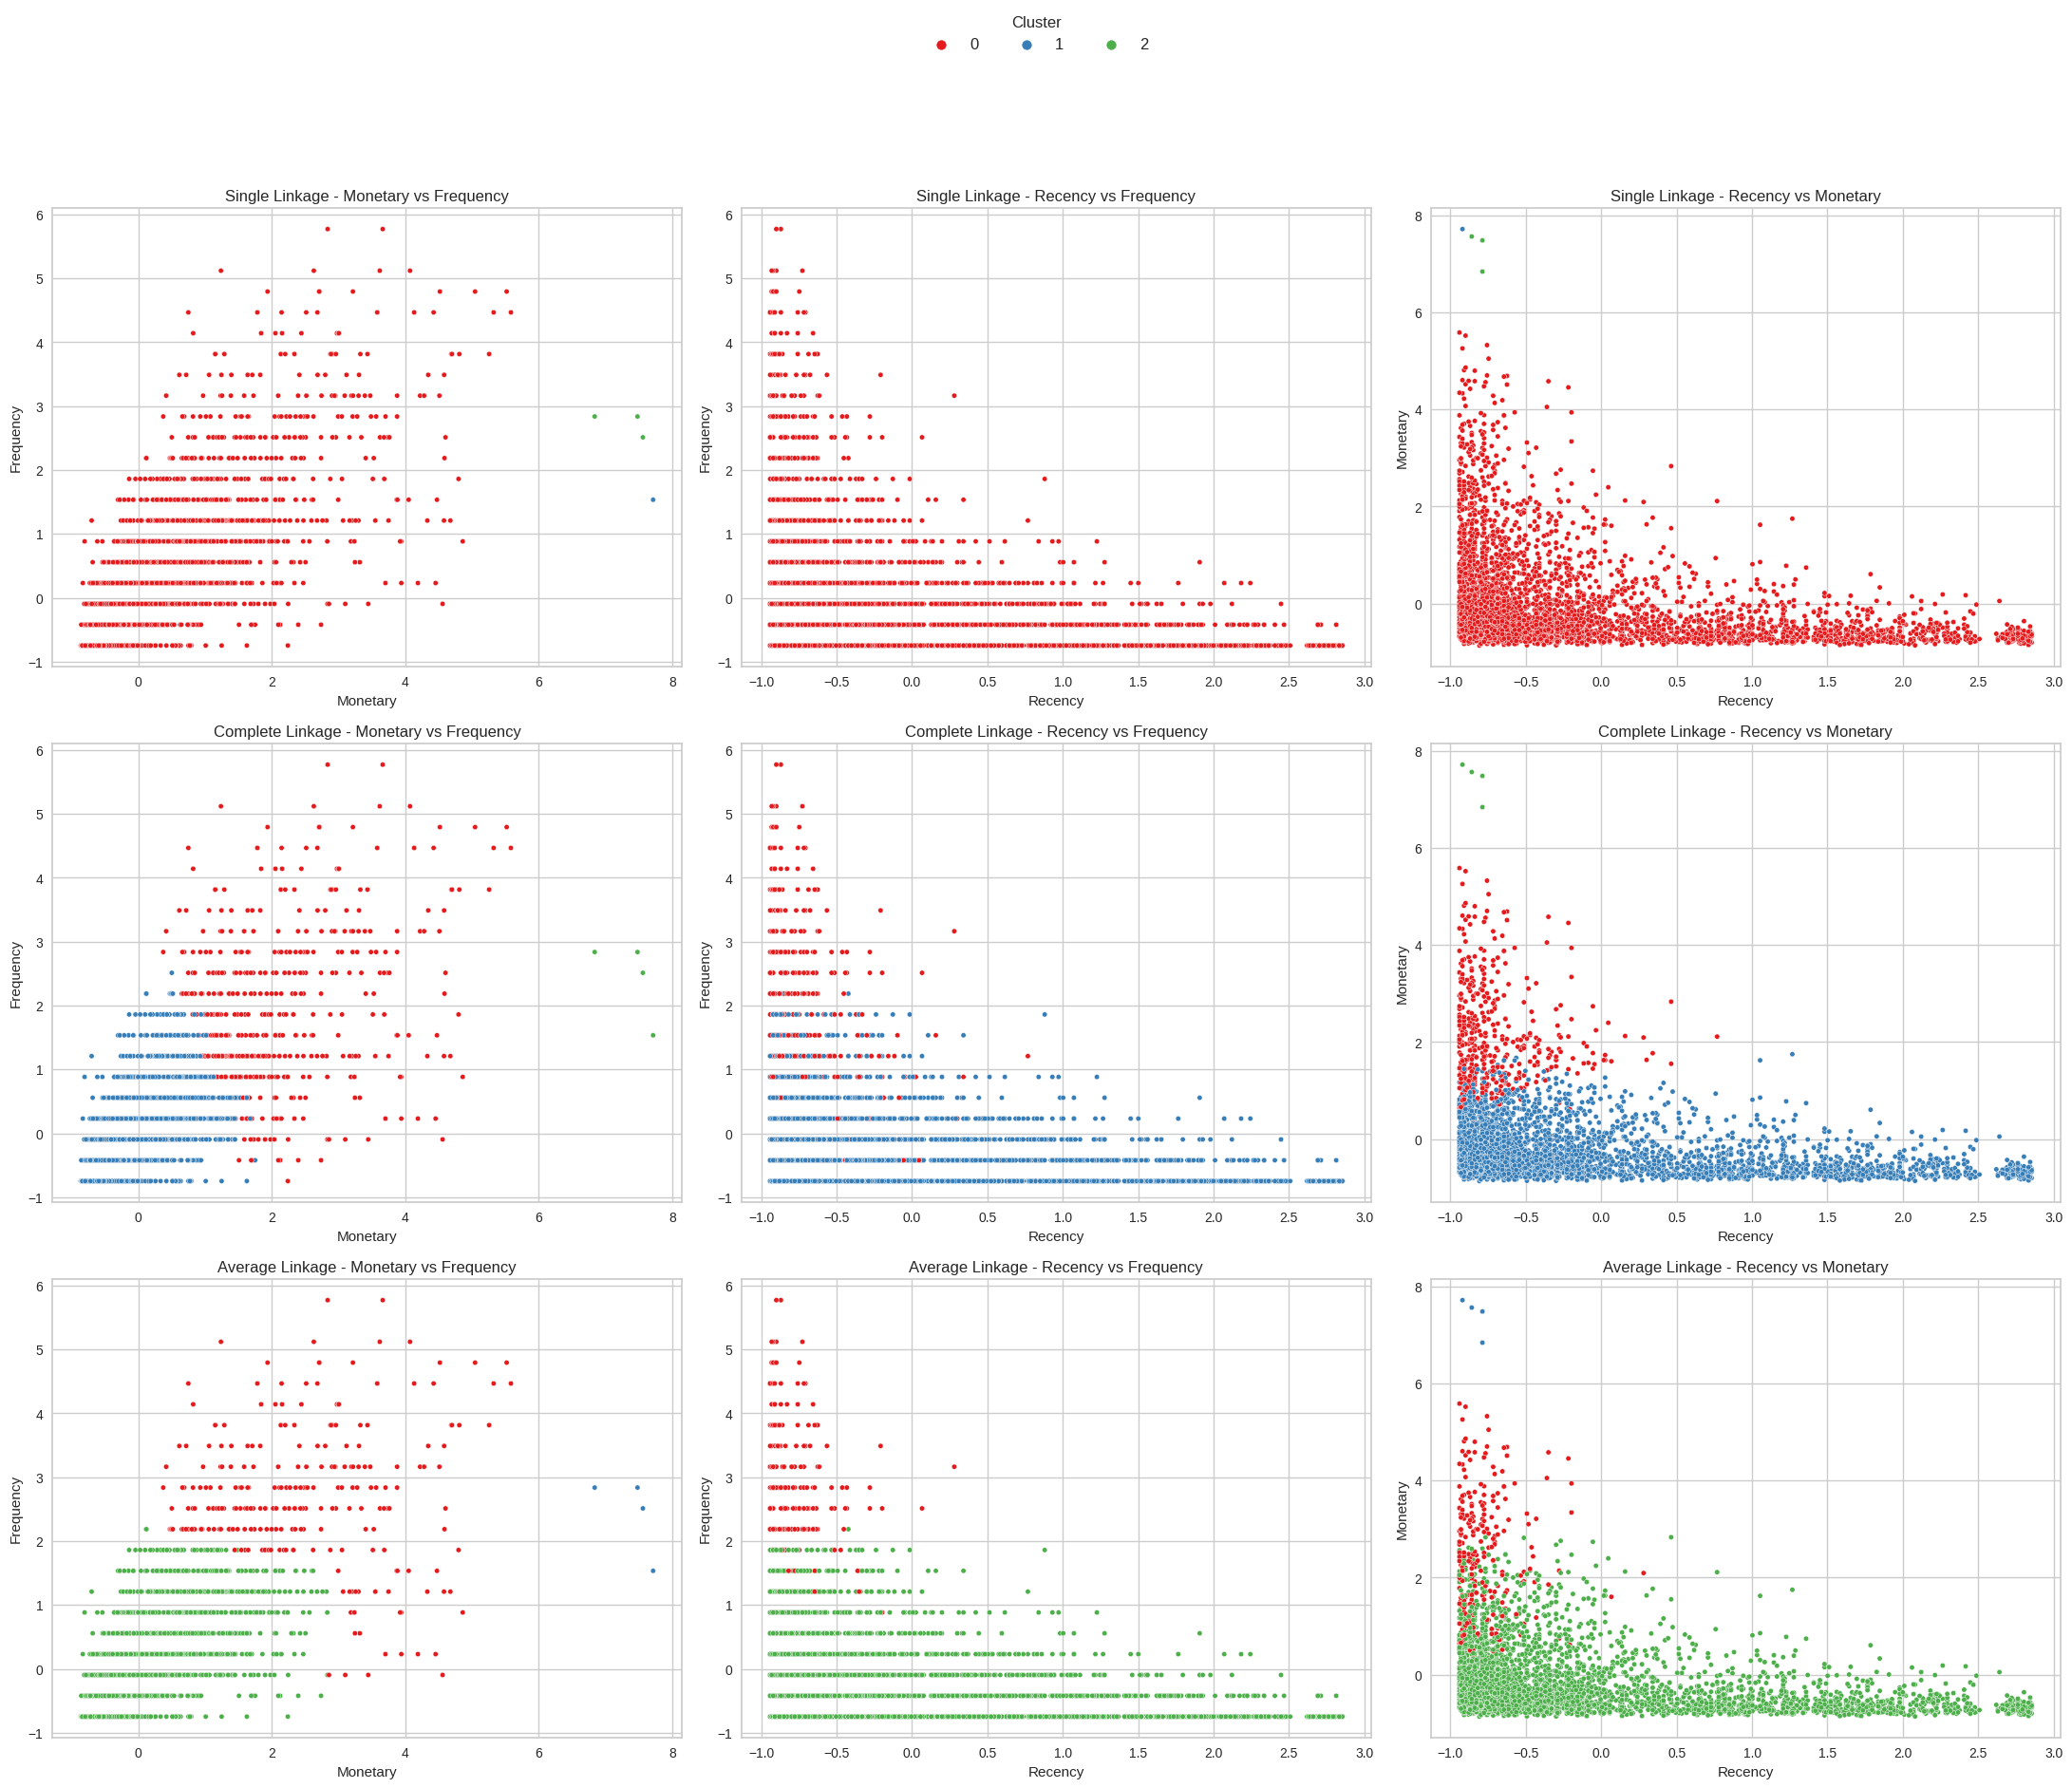

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(22, 18))

methods = ["HC_Single", "HC_Complete", "HC_Average"]
titles = ["Single Linkage", "Complete Linkage", "Average Linkage"]
pairs = [
    ("Monetary", "Frequency", "Monetary vs Frequency"),
    ("Recency", "Frequency", "Recency vs Frequency"),
    ("Recency", "Monetary", "Recency vs Monetary")
]

# Loop through each method and pair of features
for i, method in enumerate(methods):
    for j, (x, y, title) in enumerate(pairs):
        sns.scatterplot(
            data=df_agnes, x=x, y=y,
            hue=method, palette="Set1", s=15, ax=axes[i, j]
        )
        axes[i, j].set_title(f"{titles[i]} - {title}")
        axes[i, j].legend([],[], frameon=False) 

# Create one global legend outside the subplots
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Cluster", loc="upper center",
    bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=12
)

plt.tight_layout(rect=[0,0,1,0.95]) 
plt.show()

In [48]:
df_agnes

,Recency,Frequency,Monetary,HC_Single,HC_Complete,HC_Average
0,-0.930222,2.512225,2.507574,0,0,0
1,-0.909877,0.557952,2.423121,0,0,2
2,-0.920050,0.232239,-0.106183,0,1,2
3,1.226379,-0.744897,-0.788705,0,1,2
4,-0.228310,-0.419185,-0.100930,0,1,2
...,...,...,...,...,...,...
3720,1.877428,-0.744897,-0.718109,0,1,2
3721,0.890681,-0.744897,-0.798265,0,1,2
3722,-0.869186,-0.419185,-0.720157,0,1,2
3723,-0.909877,4.140786,0.819682,0,0,0


### Evaluation

In [49]:
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

# Features
X = df_agnes[["Recency", "Frequency", "Monetary"]].values

methods = ["HC_Single", "HC_Complete", "HC_Average"]

for method in methods:
    print(f"\n--- Evaluation for {method} ---")
    labels = df_agnes[method].values
    
    # 1. Silhouette Score
    sil_score = silhouette_score(X, labels)
    print(f"Silhouette Score: {sil_score:.3f}")
    
    # 2. Intra-cluster distance (within clusters)
    intra_distances = []
    centroids = []
    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
        intra_dist = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
        intra_distances.append(intra_dist)
    
    centroids = np.array(centroids)
    print(f"Average intra-cluster distances per cluster: {np.round(intra_distances, 3)}")
    
    # 3. Inter-cluster distance (between centroids)
    inter_distances = cdist(centroids, centroids)
    inter_distances = inter_distances[np.triu_indices_from(inter_distances, k=1)]
    print(f"Average inter-cluster distance: {np.mean(inter_distances):.3f}")
    
    # 4. Calinski-Harabasz Index
    calinski_harabasz_index = calinski_harabasz_score(X, labels)
    print(f"Calinski-Harabasz Index: {calinski_harabasz_index:.3f}")
    
    # 5. Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(X, labels)
    print(f"Davies-Bouldin Index: {davies_bouldin_index:.3f}")


--- Evaluation for HC_Single ---
Silhouette Score: 0.725
Average intra-cluster distances per cluster: [1.44  0.    0.345]
Average inter-cluster distance: 5.678
Calinski-Harabasz Index: 42.027
Davies-Bouldin Index: 0.257

--- Evaluation for HC_Complete ---
Silhouette Score: 0.537
Average intra-cluster distances per cluster: [1.448 1.142 0.562]
Average inter-cluster distance: 5.627
Calinski-Harabasz Index: 1338.096
Davies-Bouldin Index: 0.633

--- Evaluation for HC_Average ---
Silhouette Score: 0.573
Average intra-cluster distances per cluster: [1.445 0.562 1.217]
Average inter-cluster distance: 5.682
Calinski-Harabasz Index: 1041.988
Davies-Bouldin Index: 0.577


## DBSCAN